In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
train_data = pd.read_csv('~/Downloads/data/train_50.csv')
val_data = pd.read_csv('~/Downloads/data/dev_50.csv')
test_data = pd.read_csv('~/Downloads/data/test_50.csv')

In [3]:
train_labels = train_data['LABELS']
val_labels = val_data['LABELS']
test_labels = test_data['LABELS']

In [4]:
all_labels = ';'.join([';'.join(train_labels), ';'.join(val_labels), ';'.join(test_labels)]).split(';')
all_chapters = [elem.split('.')[0] for elem in all_labels]
label_counter = Counter(all_labels)
ch_counter = Counter(all_chapters)

In [5]:
label_counter.most_common()

[('401.9', 4719),
 ('38.93', 2874),
 ('428.0', 2874),
 ('427.31', 2858),
 ('414.01', 2744),
 ('272.4', 2282),
 ('584.9', 2102),
 ('250.00', 2045),
 ('96.04', 2042),
 ('96.6', 1978),
 ('96.71', 1937),
 ('518.81', 1695),
 ('599.0', 1532),
 ('39.61', 1530),
 ('530.81', 1489),
 ('99.04', 1392),
 ('285.9', 1309),
 ('96.72', 1296),
 ('272.0', 1232),
 ('244.9', 1151),
 ('285.1', 1118),
 ('486', 1098),
 ('88.56', 1092),
 ('276.2', 1057),
 ('38.91', 1050),
 ('36.15', 992),
 ('V58.61', 961),
 ('496', 936),
 ('995.92', 912),
 ('403.90', 890),
 ('99.15', 882),
 ('311', 868),
 ('585.9', 866),
 ('305.1', 852),
 ('038.9', 832),
 ('276.1', 778),
 ('507.0', 766),
 ('287.5', 747),
 ('V15.82', 741),
 ('88.72', 710),
 ('412', 710),
 ('39.95', 709),
 ('V45.81', 683),
 ('410.71', 682),
 ('37.22', 678),
 ('33.24', 630),
 ('424.0', 627),
 ('511.9', 601),
 ('45.13', 584),
 ('37.23', 546)]

In [6]:
ch_counter.most_common()

[('96', 7253),
 ('401', 4719),
 ('38', 3924),
 ('272', 3514),
 ('428', 2874),
 ('427', 2858),
 ('414', 2744),
 ('285', 2427),
 ('99', 2274),
 ('39', 2239),
 ('584', 2102),
 ('250', 2045),
 ('276', 1835),
 ('88', 1802),
 ('518', 1695),
 ('599', 1532),
 ('530', 1489),
 ('37', 1224),
 ('244', 1151),
 ('486', 1098),
 ('36', 992),
 ('V58', 961),
 ('496', 936),
 ('995', 912),
 ('403', 890),
 ('311', 868),
 ('585', 866),
 ('305', 852),
 ('038', 832),
 ('507', 766),
 ('287', 747),
 ('V15', 741),
 ('412', 710),
 ('V45', 683),
 ('410', 682),
 ('33', 630),
 ('424', 627),
 ('511', 601),
 ('45', 584)]

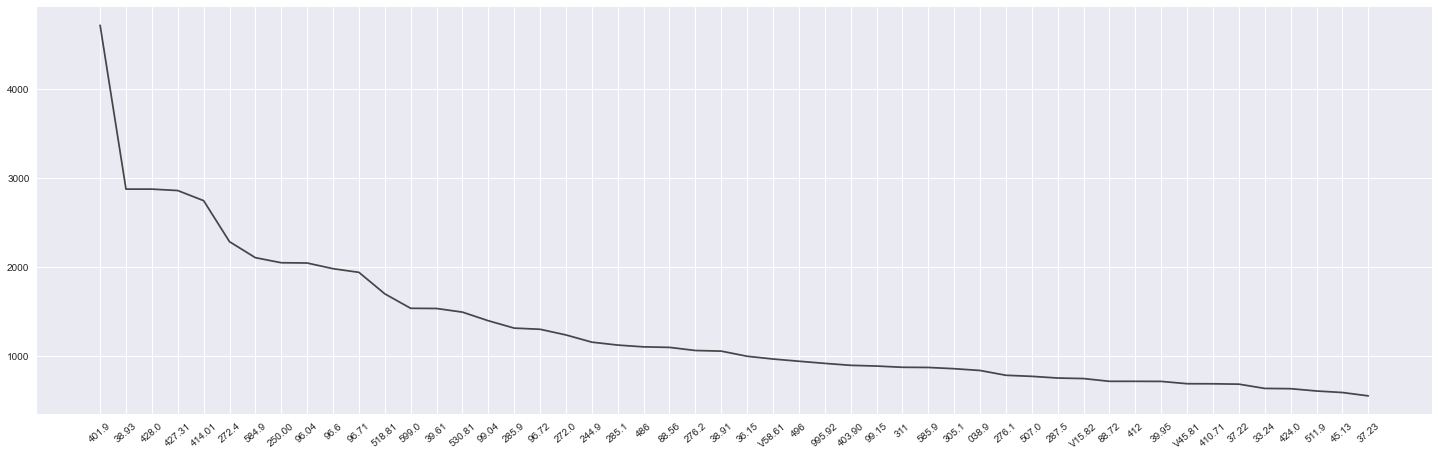

In [7]:
freqs = [elem[1] for elem in label_counter.most_common()]
ticks = [elem[0] for elem in label_counter.most_common()]

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(25,7.5))
plt.xticks(np.arange(50), ticks,rotation=40)
ax.plot(freqs, 'black', alpha=0.7)
plt.show()

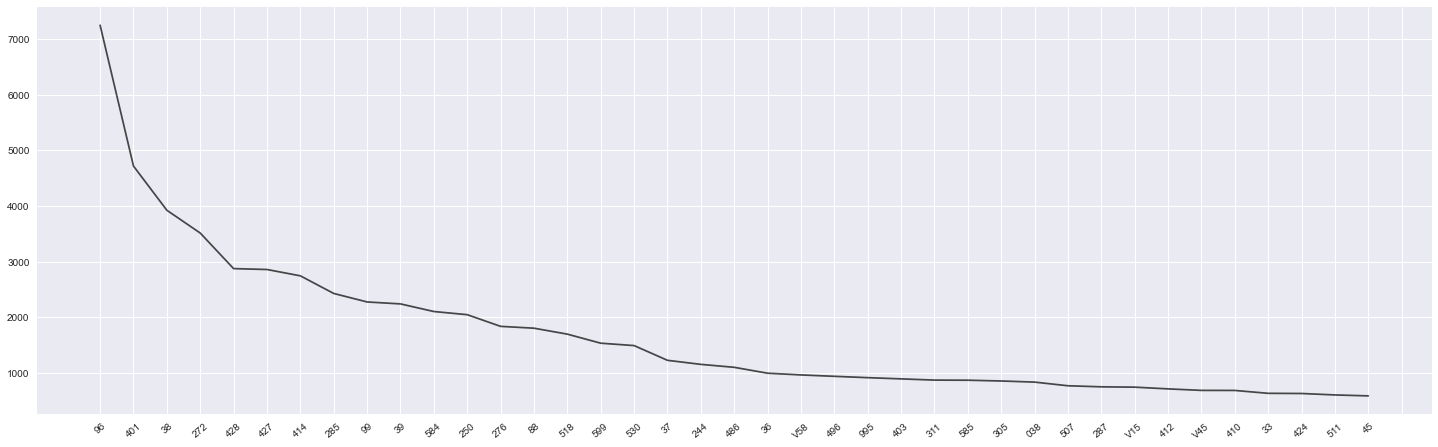

In [8]:
ch_freqs = [elem[1] for elem in ch_counter.most_common()]
ch_ticks = [elem[0] for elem in ch_counter.most_common()]

plt.style.use('seaborn')
ch_fig, ch_ax = plt.subplots(figsize=(25,7.5))
plt.xticks(np.arange(50), ch_ticks,rotation=40)
ch_ax.plot(ch_freqs, 'black', alpha=0.7)
plt.show()

In [9]:
train_text = train_data['LABELS']
val_text = val_data['LABELS']
test_text = test_data['LABELS']

In [10]:
labels_freqs = dict(label_counter)

In [25]:
import torch

freq_w = torch.tensor([labels_freqs[elem] for elem in labels_freqs])
freq_w = torch.true_divide(freq_w, torch.sum(freq_w))

In [26]:
freq_w

tensor([0.0114, 0.0320, 0.0089, 0.0347, 0.0718, 0.0295, 0.0227, 0.0311, 0.0146,
        0.0161, 0.0435, 0.0175, 0.0418, 0.0438, 0.0160, 0.0199, 0.0118, 0.0197,
        0.0301, 0.0113, 0.0167, 0.0258, 0.0127, 0.0139, 0.0132, 0.0212, 0.0188,
        0.0083, 0.0438, 0.0166, 0.0103, 0.0311, 0.0151, 0.0233, 0.0170, 0.0095,
        0.0108, 0.0104, 0.0134, 0.0104, 0.0132, 0.0092, 0.0108, 0.0136, 0.0130,
        0.0143, 0.0233, 0.0096, 0.0108, 0.0117])

In [23]:
freq_w = torch.true_divide(torch.ones(50), freq_w)

In [44]:
freq_w

tensor([0.0114, 0.0320, 0.0089, 0.0347, 0.0718, 0.0295, 0.0227, 0.0311, 0.0146,
        0.0161, 0.0435, 0.0175, 0.0418, 0.0438, 0.0160, 0.0199, 0.0118, 0.0197,
        0.0301, 0.0113, 0.0167, 0.0258, 0.0127, 0.0139, 0.0132, 0.0212, 0.0188,
        0.0083, 0.0438, 0.0166, 0.0103, 0.0311, 0.0151, 0.0233, 0.0170, 0.0095,
        0.0108, 0.0104, 0.0134, 0.0104, 0.0132, 0.0092, 0.0108, 0.0136, 0.0130,
        0.0143, 0.0233, 0.0096, 0.0108, 0.0117])

In [53]:
list(freq_w.size())[0]

50

In [40]:
import pickle
pickle.dump(labels_freqs, open('label_counter.pkl', 'wb'))

In [32]:
pickle.load(open('label_freqs.pkl', 'rb'))

{'287.5': 747,
 '584.9': 2102,
 '45.13': 584,
 '272.4': 2282,
 '401.9': 4719,
 '96.71': 1937,
 '530.81': 1489,
 '96.04': 2042,
 'V58.61': 961,
 '276.2': 1057,
 '427.31': 2858,
 '244.9': 1151,
 '414.01': 2744,
 '38.93': 2874,
 '38.91': 1050,
 '285.9': 1309,
 '276.1': 778,
 '96.72': 1296,
 '96.6': 1978,
 'V15.82': 741,
 '486': 1098,
 '518.81': 1695,
 '038.9': 832,
 '995.92': 912,
 '311': 868,
 '99.04': 1392,
 '272.0': 1232,
 '37.23': 546,
 '428.0': 2874,
 '88.56': 1092,
 '37.22': 678,
 '250.00': 2045,
 '36.15': 992,
 '39.61': 1530,
 '285.1': 1118,
 '424.0': 627,
 '88.72': 710,
 'V45.81': 683,
 '99.15': 882,
 '410.71': 682,
 '585.9': 866,
 '511.9': 601,
 '39.95': 709,
 '403.90': 890,
 '305.1': 852,
 '496': 936,
 '599.0': 1532,
 '33.24': 630,
 '412': 710,
 '507.0': 766}

In [41]:
all_train_labels = ';'.join(train_labels).split(';')
train_label_counter = dict(Counter(all_train_labels))

In [43]:
pickle.dump(train_label_counter, open('train_label_counter.pkl', 'wb'))